##### Copyright 2025 Google LLC.

In [1]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Guess the shape: Triangle, square, pentagon, ?

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Guess_the_shape.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

This notebook provides a quick code example showing how to use multiple images in the same prompt with the Gemini API. You'll show the model a sequence of shapes (a triangle, a square, and a pentagon) and ask it to guess the shape that comes next.

In [2]:
%pip install -U -q "google-genai>=1.0.0"

In [3]:
from google import genai
genai.__version__

'1.9.0'

In [4]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

In [5]:
!curl -o triangle.png "https://storage.googleapis.com/generativeai-downloads/images/triangle.png" --silent
!curl -o square.png "https://storage.googleapis.com/generativeai-downloads/images/square.png" --silent
!curl -o pentagon.png "https://storage.googleapis.com/generativeai-downloads/images/pentagon.png" --silent

In [6]:
MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.5-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

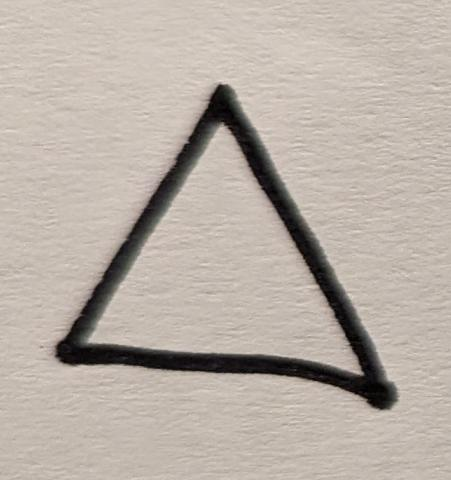

In [7]:
import PIL
from IPython.display import display

triangle = PIL.Image.open('triangle.png')
display(triangle)

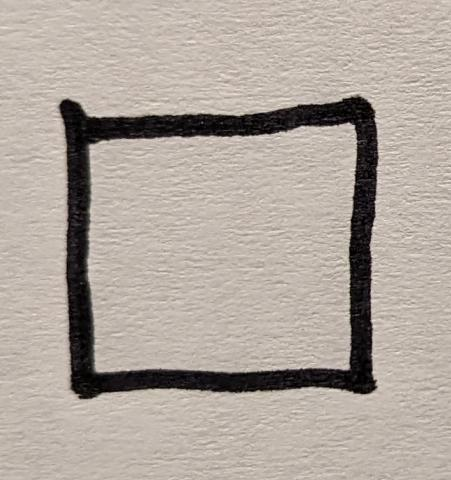

In [8]:
square = PIL.Image.open('square.png')
display(square)

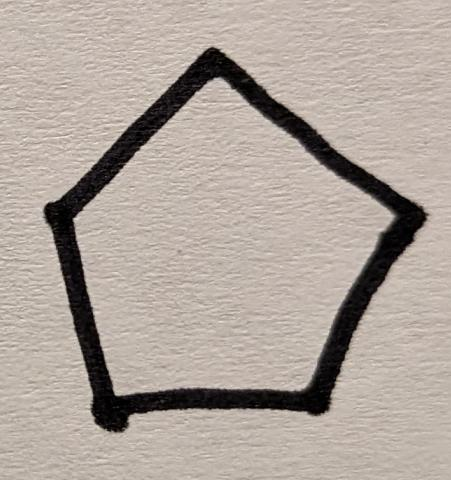

In [9]:
pentagon = PIL.Image.open('pentagon.png')
display(pentagon)

In [10]:
prompt = """
    Look at this sequence of three shapes. What shape should come as the fourth shape? Explain
    your reasoning with detailed descriptions of the first shapes.
"""

In [11]:
from IPython.display import Markdown

In [12]:
contents = [
    prompt,
    triangle,
    square,
    pentagon
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=contents
)
display(Markdown(response.text))

Okay, let's analyze the sequence and predict the next shape.

**Shapes and their characteristics:**

*   **First Shape:** A triangle. It has three sides and three angles.

*   **Second Shape:** A square. It has four sides and four angles.

*   **Third Shape:** A pentagon. It has five sides and five angles.

**Reasoning:**

The sequence shows a progression where each shape adds one more side and angle than the previous shape. We have:

*   3 sides (triangle)
*   4 sides (square)
*   5 sides (pentagon)

**Prediction:**

Following this pattern, the next shape should have six sides and six angles.

**Therefore, the fourth shape in the sequence should be a hexagon.**

## Further reading

In this notebook, you included images directly in the prompt. This is fine for small images. If your prompts will exceed 20MB in size, you can use the [Files API](https://github.com/google-gemini/cookbook/tree/main/quickstarts/file-api) to upload your images (and other media types) in advance.